# 다중 분류 - 아이리스 품종 분류

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(2022)
tf.random.set_seed(seed)

## 데이터 전처리

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# X data는 정규화
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(iris.data)
X_scaled.shape

(150, 4)

In [8]:
# Y data는 One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_onehot = to_categorical(iris.target)
Y_onehot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
Y_onehot.shape

(150, 3)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y_onehot, stratify=Y_onehot, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

## 모델 정의/설정/학습/평가

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([
                    Dense(16, input_dim=4, activation='relu'),       # Hidden Layer
                    Dense(3, activation='softmax')                   # Output Layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',        # 다중 분류 시 오차 함수
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    X_train, y_train, validation_split=0.2, epochs=200, batch_size=50, verbose=0
)

In [19]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 0.2548 - accuracy: 0.9333


[0.2547621726989746, 0.9333333373069763]

## 모델 save/load

In [20]:
!mkdir model

In [21]:
model.save('model/iris.h5')

In [23]:
from tensorflow.keras.models import load_model
my_model = load_model('model/iris.h5')

In [24]:
my_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 104ms/step - loss: 0.2548 - accuracy: 0.9333


[0.2547621726989746, 0.9333333373069763]

## 학습과정 시각화

In [33]:
import matplotlib.pyplot as plt

In [36]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

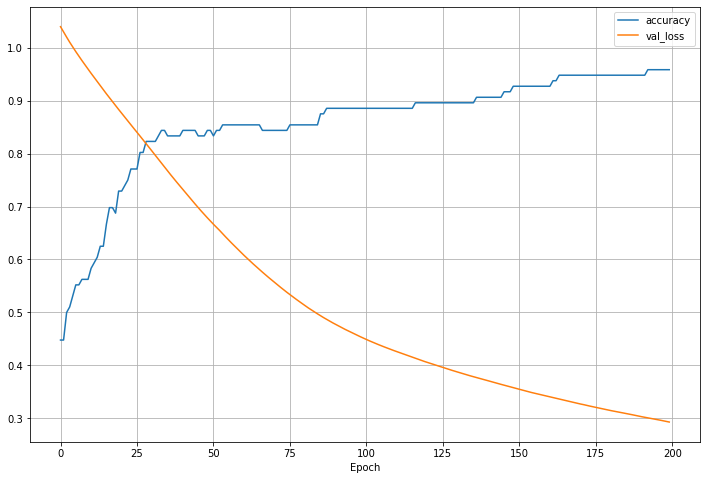

In [39]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, markersize=2, label='val_loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

### Epoch 횟수를 더 늘려서 학습

In [57]:
model2 = Sequential([
                    Dense(16, input_dim=4, activation='relu'),       # Hidden Layer
                    Dense(3, activation='softmax')                   # Output Layer
])

In [58]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history2 = model2.fit(
    X_train, y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=0
)

In [60]:
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 15ms/step - loss: 0.1340 - accuracy: 0.9333


[0.13400475680828094, 0.9333333373069763]

In [61]:
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

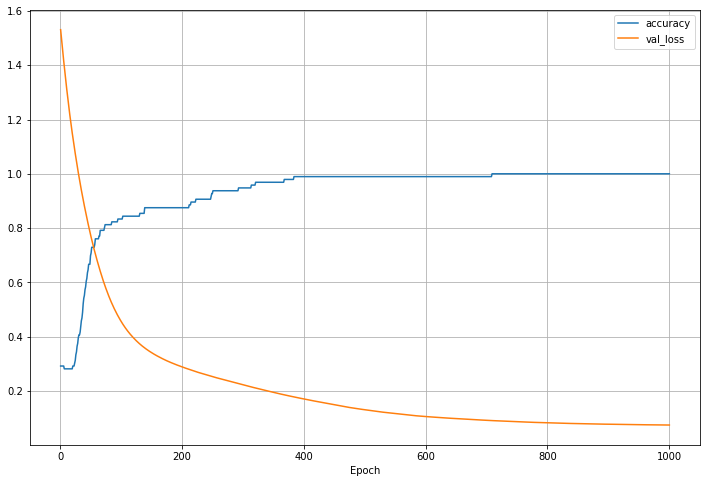

In [62]:
plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, ms=2, label='accuracy')
plt.plot(xs2, y_vloss2, ms=2, label='val_loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [56]:
# del model2    <-- 저장된 모델 지우기